# Day 31

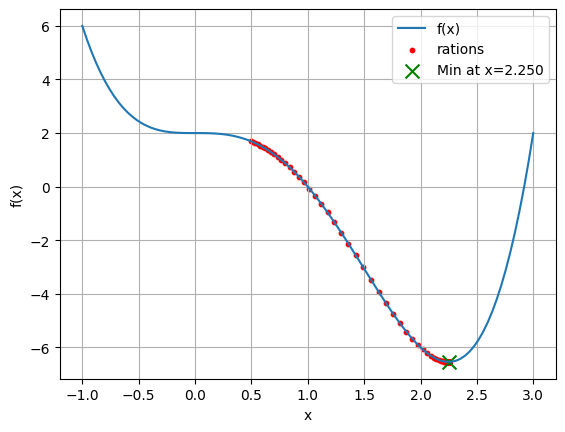

In [ ]:
# Bài 1: Tối ưu hàm một biến bằng Gradient Descent
import numpy as np
import matplotlib.pyplot as plt

def f(x):
  return x**4 - 3*(x**3) + 2

def f_prime(x):
  return 4*(x**3) - 9*(x**2)

# Gradient Descent
def gradient_descent(f_prime, x_init, learning_rate=0.01, epochs=100):
  x = x_init
  history = [x]

  for _ in range(epochs):
    gradient = f_prime(x)
    x = x - gradient * learning_rate
    history.append(x)

  return x, history

# Chạy Gradient Descent
x_init = 0.5
learning_rate = 0.01
epochs = 100
x_optimal, history = gradient_descent(f_prime, x_init, learning_rate, epochs)

# Vẽ đồ thị
x_vals = np.linspace(-1, 3, 100)
y_vals = f(x_vals)

plt.plot(x_vals, y_vals, label="f(x)")
plt.scatter(history, [f(x) for x in history], color="red", s=10, label="rations")
plt.scatter(x_optimal, f(x_optimal), color="green", marker="x", s=100, label=f"Min at x={x_optimal:.3f}")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid()
plt.show()

Epoch 0, Loss: 18.000, w: 0.280, b: 0.080
Epoch 100, Loss: 0.042, w: 1.132, b: 0.523
Epoch 200, Loss: 0.021, w: 1.094, b: 0.660
Epoch 300, Loss: 0.011, w: 1.067, b: 0.758
Epoch 400, Loss: 0.005, w: 1.048, b: 0.827
Epoch 500, Loss: 0.003, w: 1.034, b: 0.877
Epoch 600, Loss: 0.001, w: 1.024, b: 0.912
Epoch 700, Loss: 0.001, w: 1.017, b: 0.937
Epoch 800, Loss: 0.000, w: 1.012, b: 0.955
Epoch 900, Loss: 0.000, w: 1.009, b: 0.968


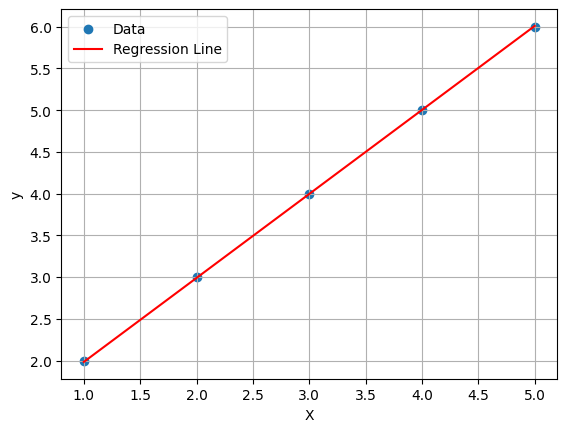

Hệ số tối ưu: w = 1.006, b = 0.977


In [ ]:
# Bài 2: Hồi quy tuyến tính với Gradient Descent
import numpy as np
import matplotlib.pyplot as plt

X = np.array([1, 2, 3, 4, 5])
y = np.array([2, 3, 4, 5, 6])

w, b = 0.0, 0.0
learning_rate = 0.01
epochs = 1000

for _ in range(epochs):
  y_pred = w * X + b
  loss = np.mean((y_pred - y) ** 2)
  dw = np.mean(2 * (y_pred - y) * X)
  db = np.mean(2 * (y_pred - y))
  w -= learning_rate * dw
  b -= learning_rate * db
  if _ % 100 == 0:
    print(f"Epoch {_}, Loss: {loss:.3f}, w: {w:.3f}, b: {b:.3f}")

# Vẽ đồ thị
plt.scatter(X, y, label="Data")
plt.plot(X, y_pred, color='red', label="Regression Line")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()

print(f"Hệ số tối ưu: w = {w:.3f}, b = {b:.3f}")

In [ ]:
# Bài 3: Newton's method
def f_prime(x):
  return 3*(x**2) - 12*x + 4

def f_double_prime(x):
  return 6*x - 12

x = 5
for _ in range(10):
  x = x - f_prime(x) / f_double_prime(x)
  print(f"Iteration {_ + 1}: x = {x:.3f}")


print(f"Cực tiểu tại x = {x:.3f}")
## Đáp số: Cực tiểu tại x = 3.633

Iteration 1: x = 3.944
Iteration 2: x = 3.658
Iteration 3: x = 3.633
Iteration 4: x = 3.633
Iteration 5: x = 3.633
Iteration 6: x = 3.633
Iteration 7: x = 3.633
Iteration 8: x = 3.633
Iteration 9: x = 3.633
Iteration 10: x = 3.633
Cực tiểu tại x = 3.633


# Day 32

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = np.array([
    [92.5, 2.1, 65.3, 1800],
    [93.2, 2.5, 67.2, 1825],
    [91.8, 2.3, 64.0, 1795],
    [94.0, 2.8, 70.1, 1850],
    [95.2, 3.0, 72.5, 1880],
    [96.1, 3.2, 74.3, 1905],
    [90.5, 1.8, 61.0, 1750],
    [92.0, 2.0, 63.2, 1780],
    [89.5, 1.5, 59.8, 1725],
    [97.0, 3.5, 76.2, 1925],
    [95.8, 3.1, 73.8, 1890],
    [94.5, 2.9, 71.5, 1860],
    [91.2, 2.2, 62.8, 1775],
    [90.0, 1.7, 60.5, 1740],
    [98.0, 3.7, 78.0, 1950],
    [99.2, 4.0, 80.5, 1980],
    [88.5, 1.3, 58.0, 1700],
    [87.8, 1.1, 56.5, 1680],
    [86.5, 1.0, 55.0, 1650],
    [100.0, 4.2, 82.0, 2000]
])

X = data[:, :-1]  # Các đặc trưng là USD index, Lạm phát (%), Giá dầu (USD)
y = data[:, -1]   # Lấy cột cuối là Giá vàng (USD)

In [ ]:
class LinearRegression:
  def __init__(self):
    self.w = np.zeros(X.shape[1]) # weights cho 3 features
    self.b = 0 # Bias

  def compute_gradients(self, X, y):
    y_pred = X.dot(self.w) + self.b
    dw = 2 * X.T.dot(y_pred - y) / X.shape[0]
    db = 2 * np.sum(y_pred - y) / X.shape[0]
    return dw, db

  def fit(self, X, y, learning_rate=0.001, epochs=10):
    for _ in range(epochs):
      dw, db = self.compute_gradients(X, y)
      self.w -= learning_rate * dw
      self.b -= learning_rate * db

  def predict(self, X):
    return X.dot(self.w) + self.b

X_normalized = (X - np.mean(X, axis = 0)) / np.std(X, axis = 0)

model = LinearRegression()
model.fit(X_normalized, y, learning_rate=0.05, epochs=1000)

print("\nFinal weights:", model.w)
print("Final bias:", model.b)

y_pred = model.predict(X_normalized)

print("\nSo sánh kết quả thực tế và dự đoán:")
for i in range(5):
  print(f"Thực tế: {y[i]:.2f}, Dự đoán: {y_pred[i]:.2f}")



Final weights: [44.50968152 29.55847415 23.99202775]
Final bias: 1822.9999999999989

So sánh kết quả thực tế và dự đoán:
Thực tế: 1800.00, Dự đoán: 1795.52
Thực tế: 1825.00, Dự đoán: 1822.35
Thực tế: 1795.00, Dự đoán: 1789.60
Thực tế: 1850.00, Dự đoán: 1850.19
Thực tế: 1880.00, Dự đoán: 1878.13


# Day 33

In [ ]:
import sqlite3
import pandas as pd

In [ ]:
connection = sqlite3.connect('database.sqlite')
cursor = connection.cursor()

In [ ]:
cursor.execute("""
    CREATE TABLE PRODUCT(
      ID integer primary key,
      NAME text not null,
      PRICE integer not null
    );
""")
connection.commit()

In [ ]:
# Bài 1:
cursor.execute("""
  INSERT INTO PRODUCT(ID, NAME, PRICE)
  VALUES
    (1, "iPhone 15", 18000000),
    (2, "Galaxy Z-Fold 5", 30000000);
""")
connection.commit()

data = pd.read_sql_query("SELECT * FROM PRODUCT", connection)
print(data)

In [ ]:
# Bài 2:
cursor.execute("""
  UPDATE PRODUCT
  SET PRICE = 50000000
  WHERE ID = 2;
""")
connection.commit()
data = pd.read_sql_query("SELECT * FROM PRODUCT", connection)
print(data)

   ID             NAME     PRICE
0   1        iPhone 15  50000000
1   2  Galaxy Z-Fold 5  50000000


In [ ]:
# Bài 3:
cursor.execute("""
  DELETE FROM PRODUCT
  WHERE ID = 1;
""")
connection.commit()
data = pd.read_sql_query("SELECT * FROM PRODUCT", connection)
print(data)

   ID             NAME     PRICE
0   2  Galaxy Z-Fold 5  50000000


# Day 34

In [ ]:
import sqlite3
import pandas as pd

connection = sqlite3.connect('database.sqlite')
cursor = connection.cursor()

In [ ]:
cursor.execute("""
  CREATE TABLE STOCK(
    ID integer primary key,
    NAME text not null,
  BUY integer not null,
  INVESTOR text not null
  )
""")
connection.commit()

In [ ]:
cursor.execute("""
  INSERT INTO STOCK(ID, NAME, BUY, INVESTOR)
  VALUES
    (1, "ACB", 29.45, "Nguyen"),
    (2, "VIC", 44.55, "Nguyen"),
    (3, "GMD", 74.30, "Nguyen"),
    (4, "ACB", 28.45, "Vinh"),
    (5, "VIC", 40.55, "Vinh"),
    (6, "GMD", 60.30, "Vinh");
""")

In [ ]:
connection.commit()
data = pd.read_sql_query("SELECT * FROM STOCK", connection)
print(data)

   ID NAME    BUY INVESTOR
0   1  ACB  29.45   Nguyen
1   2  VIC  44.55   Nguyen
2   3  GMD  74.30   Nguyen
3   4  ACB  28.45     Vinh
4   5  VIC  40.55     Vinh
5   6  GMD  60.30     Vinh


In [ ]:
# Bài 1:
query = """
  SELECT SUM(BUY) AS  BUY
  FROM STOCK;
"""

data_total_buy = pd.read_sql_query(query, connection)
print(data_total_buy)

     BUY
0  277.6


In [ ]:
# Bài 2:
query = """
  SELECT INVESTOR, NAME, MAX(BUY) AS MAX_BUY
  FROM STOCK
  GROUP BY INVESTOR;
"""

data_maxprice_byInvestor = pd.read_sql_query(query, connection)
print(data_maxprice_byInvestor)

  INVESTOR NAME  MAX_BUY
0   Nguyen  GMD     74.3
1     Vinh  GMD     60.3


# Day 35

In [11]:
import sqlite3
import pandas as pd

In [1]:
connection = sqlite3.connect('databse.sqlite')
cursor = connection.cursor()

In [8]:
# Câu 1: Tạo bảng Salepersons
cursor.execute("""
  CREATE TABLE IF NOT EXISTS Salespersons(
    SalespersonID integer primary key,
    FullName varchar,
    Email varchar,
    PhoneNumber varchar
  );
""")

# Câu 2: Tạo bảng Customers
cursor.execute("""
  CREATE TABLE IF NOT EXISTS Customers(
    CustomerID integer primary key,
    FullName varchar,
    Email varchar,
    PhoneNumber varchar
  );
""")

# Câu 3: Tạo bảng Orders
cursor.execute("""
  CREATE TABLE IF NOT EXISTS Orders(
    OrderID integer primary key,
    CustomerID integer,
    SalespersonID integer,
    OrderDate date,
    TotalAmount decimal,
    FOREIGN KEY (CustomerID) REFERENCES Customers(CustomerID),
    FOREIGN KEY (SalespersonID) REFERENCES Salespersons(SalespersonID)
  );
""")

connection.commit()

In [9]:
# Câu 4: Chèn dữ liệu vào bảng Salespersons
cursor.execute("""
  INSERT INTO Salespersons (SalespersonID, FullName, Email, PhoneNumber)
  VALUES
    (1, 'Nguyễn Văn A', 'nguyenvana@example.com', '0987654321'),
    (2, 'Trần Thị B', 'tranthib@example.com', '0976543210'),
    (3, 'Lê Văn C', 'levanc@example.com', '0965432109');
""")


# Câu 5: Chèn dữ liệu vào bảng Customers
cursor.execute("""
  INSERT INTO Customers (CustomerID, FullName, Email, PhoneNumber)
  VALUES
    (1, 'Phạm Thị D', 'phamthid@example.com', '0954321098'),
    (2, 'Hoàng Văn E', 'hoangvane@example.com', '0943210987'),
    (3, 'Đỗ Thị F', 'dothif@example.com', '0932109876');
""")


# Câu 6: Chèn dữ liệu vào bảng Orders
cursor.execute("""
  INSERT INTO Orders (OrderID, CustomerID, SalespersonID, OrderDate, TotalAmount)
  VALUES
    (1, 1, 2, '2024-03-01', 5000000),
    (2, 2, 1, '2024-03-02', 7000000),
    (3, 3, 3, '2024-03-03', 6000000);
""")

connection.commit()

In [12]:
# Câu 7: Liệt kê tất cả các đơn hàng của nhân viên có SalespersonID = 1
query = """
  SELECT SalespersonID, OrderID
  FROM Orders
  WHERE SalespersonID = 1;
"""
data = pd.read_sql_query(query, connection)
print(data)

   SalespersonID  OrderID
0              1        2


In [16]:
# Câu 8: Tìm khách hàng có số lượng đơn hàng nhiều nhất
query = """
  SELECT CustomerID, COUNT(*) AS OrderCount
  FROM Orders
  GROUP BY CustomerID
  ORDER BY OrderCount DESC
  LIMIT 1;
  """
data = pd.read_sql_query(query, connection)
print(data)

   CustomerID  OrderCount
0           3           1


In [19]:
# Câu 9: Tính tổng doanh số của từng nhân viên.
query = """
  SELECT SalespersonID, SUM(TotalAmount) AS TotalSales
  FROM Orders
  GROUP BY SalespersonID;
"""

data = pd.read_sql_query(query, connection)
print(data)

   SalespersonID  TotalSales
0              1     7000000
1              2     5000000
2              3     6000000


In [22]:
# Câu 10: Tìm nhân viên có doanh số cao nhất.
query = """
  SELECT SalespersonID, SUM(TotalAmount) AS TotalSales
  FROM Orders
  GROUP BY SalespersonID
  ORDER BY TotalSales DESC
  LIMIT 1;
"""

data = pd.read_sql_query(query, connection)
print(data)

   SalespersonID  TotalSales
0              1     7000000


In [23]:
# Câu 11: Cập nhật tổng giá trị đơn hàng có OrderID = 2 thành 4.500.000
query = """
  UPDATE Orders
  SET TotalAmount = 4500000
  WHERE OrderID = 2;
"""

cursor.execute(query)
connection.commit()

data = pd.read_sql_query("SELECT * FROM Orders", connection)
print(data)

   OrderID  CustomerID  SalespersonID   OrderDate  TotalAmount
0        1           1              2  2024-03-01      5000000
1        2           2              1  2024-03-02      4500000
2        3           3              3  2024-03-03      6000000


In [24]:
# Câu 12: Cập nhật số điện thoại của khách hàng có CustomerID = 3
query = """
  UPDATE Customers
  SET PhoneNumber = '0912345678'
  WHERE CustomerID = 3;
"""

cursor.execute(query)
connection.commit()

data = pd.read_sql_query("SELECT * FROM Customers", connection)
print(data)

   CustomerID     FullName                  Email PhoneNumber
0           1   Phạm Thị D   phamthid@example.com  0954321098
1           2  Hoàng Văn E  hoangvane@example.com  0943210987
2           3     Đỗ Thị F     dothif@example.com  0912345678


In [25]:
# Câu 13: Xóa tất cả các đơn hàng của khách hàng có CustomerID = 2
query = """
  DELETE FROM Orders
  WHERE CustomerID = 2;
"""

cursor.execute(query)
connection.commit()

data = pd.read_sql_query("SELECT * FROM Orders", connection)
print(data)

   OrderID  CustomerID  SalespersonID   OrderDate  TotalAmount
0        1           1              2  2024-03-01      5000000
1        3           3              3  2024-03-03      6000000
